In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from svm_margin_plot import plot_svm_boundary

In [2]:
mouse=pd.read_csv('../Datasets/mouse_viral_study.csv')

In [3]:
mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
mouse.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## #Data Visualization

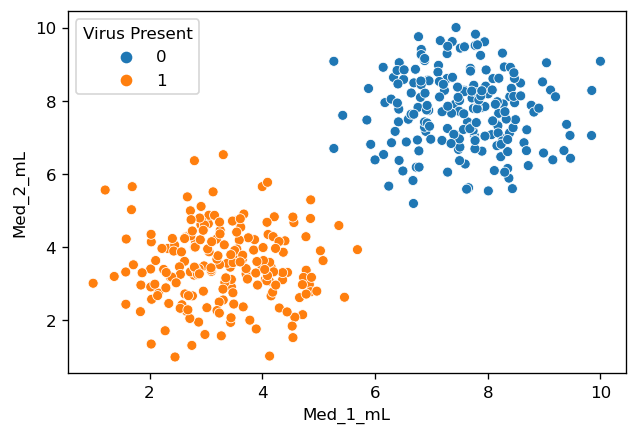

In [6]:
plt.figure(figsize=(6,4),dpi=120)
sns.scatterplot(data=mouse,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')
plt.show()

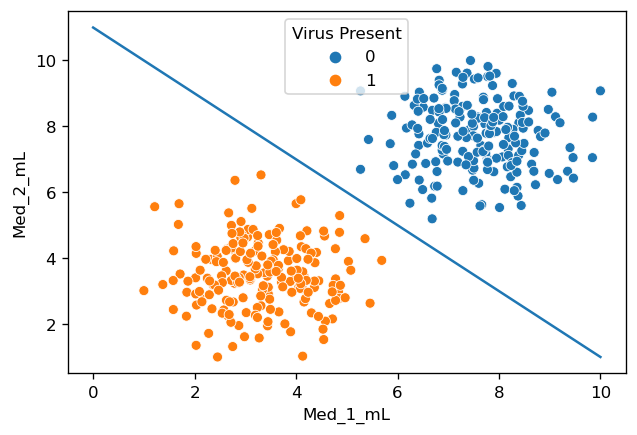

In [119]:
##hyperplane
plt.figure(figsize=(6,4),dpi=120)
x = np.linspace(0,10,100)
m=-1
c=11
y =m*x + c
sns.scatterplot(data=mouse,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')
plt.plot(x,y)
plt.show()

## #split the data into train and test

In [46]:
X = mouse.drop(columns='Virus Present',axis=1)
y = mouse['Virus Present']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.25)

## #Feature Scaling 

In [50]:
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()

In [51]:
X_train_sclar = sclar.fit_transform(X_train)
X_test_sclar = sclar.transform(X_test)

## #SVM model for default parameters(rbf)

In [77]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',C=1.0)

In [107]:
svm_model.fit(X_train_sclar,y_train)

SVC()

In [108]:
y_pred = svm_model.predict(X_test_sclar)

## #Model performance

In [109]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [110]:
accuracy_score(y_test,y_pred)

1.0

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [83]:
confusion_matrix(y_test,y_pred)

array([[55,  0],
       [ 0, 45]], dtype=int64)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


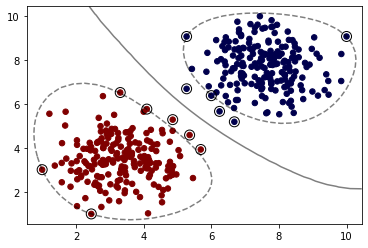

In [112]:
## svm_margin_plot for 'rbf' kernal
model = SVC(kernel='rbf')
model.fit(X,y)
plot_svm_boundary(model,X,y)

## #SVM using Poly Kernal

In [68]:
svm_model_poly = SVC(kernel='poly',degree=3,C=0.1,gamma='scale')
svm_model_poly.fit(X_train_sclar,y_train)
y_pred_poly = svm_model_poly.predict(X_test_sclar)

In [69]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#Accuracy
accuracy_score(y_test,y_pred_poly)

0.98

In [70]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.96      1.00      0.98        45

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [71]:
confusion_matrix(y_test,y_pred_poly)

array([[53,  2],
       [ 0, 45]], dtype=int64)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


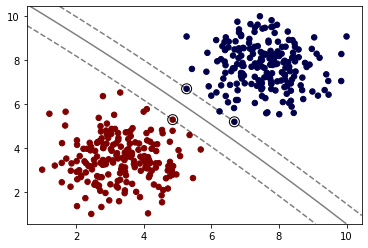

In [114]:
## svm_margin_plot for 'rbf' kernal
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X,y)

plot_svm_boundary(svm_poly,X,y)

## #SVM using Liner Kernal

In [89]:
svm_model_lin = SVC(C=1000,kernel='linear',gamma='scale',coef0=0.2)

In [90]:
svm_model_lin.fit(X_train_sclar,y_train)

SVC(C=1000, coef0=0.2, kernel='linear')

In [91]:
y_pred_lin=svm_model_lin.predict(X_test_sclar)

In [92]:
accuracy_score(y_test,y_pred_lin)

1.0

In [93]:
confusion_matrix(y_test,y_pred_lin)

array([[55,  0],
       [ 0, 45]], dtype=int64)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


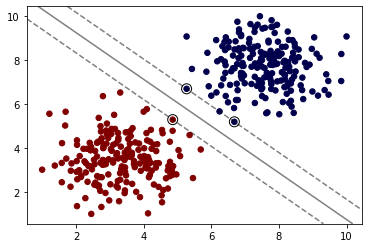

In [117]:
## svm_margin_plot for 'rbf' kernal
svm_lin = SVC(kernel='linear',C=1000,coef0=1.0,gamma='scale')
svm_lin.fit(X,y)
plot_svm_boundary(svm_lin,X,y)